In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('mf_data.xlsx')

In [3]:
df.head()

,datetime,tanaon,guihean,upper_amusig,lower_amusig,mf1_1,mf1_2,mf1_3,mf1_4,mf2_1,mf2_2,mf2_3,mf2_4
0,2021-01-01 01:00:00,0.26,0.16,0.34,0.2,5800.0,5900.0,NaN,NaN,3700.0,3700.0,3400.0,3400.0
1,2021-01-01 02:00:00,0.26,0.16,0.34,0.2,5800.0,5900.0,NaN,NaN,3700.0,3700.0,3300.0,3400.0
2,2021-01-01 03:00:00,0.26,0.16,0.35,0.2,5800.0,5700.0,NaN,NaN,3700.0,3700.0,3300.0,3300.0
3,2021-01-01 04:00:00,0.26,0.16,0.35,0.2,5700.0,5600.0,NaN,NaN,3600.0,3600.0,3300.0,3300.0
4,2021-01-01 05:00:00,0.26,0.16,0.35,0.2,5700.0,5600.0,NaN,NaN,3600.0,3600.0,3300.0,3300.0


In [7]:
df_=df.copy()

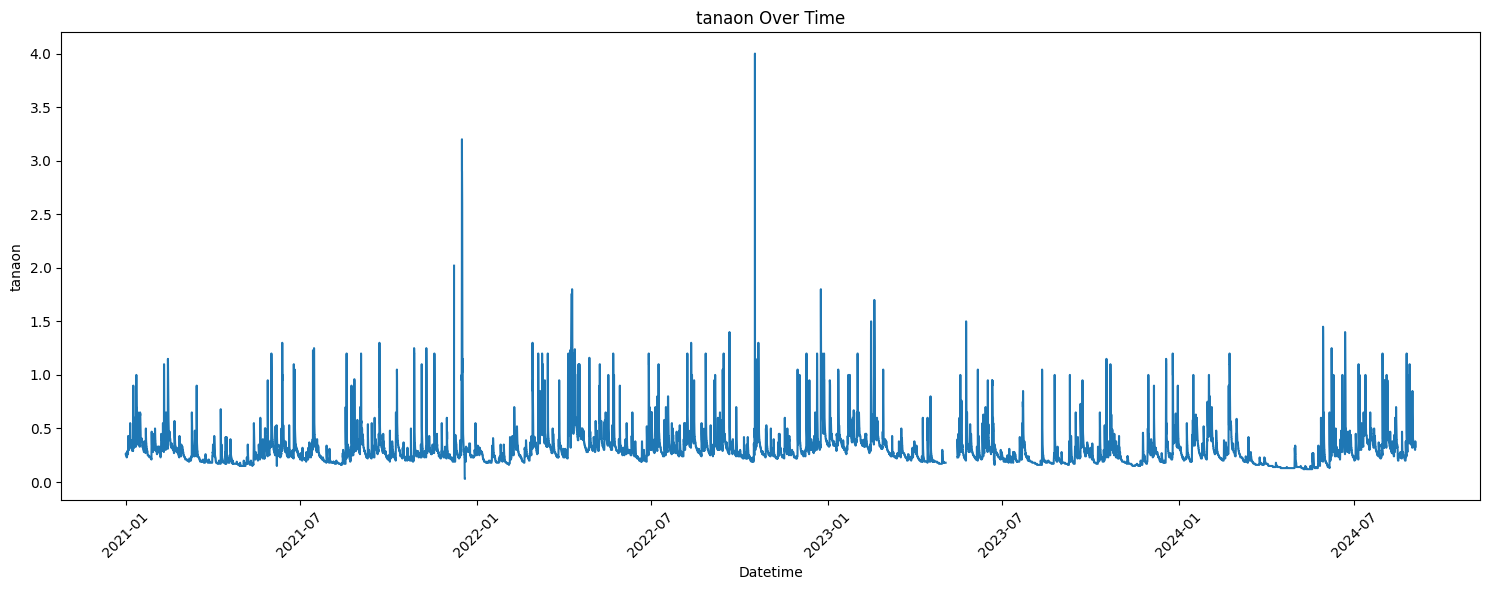

In [ ]:


plt.figure(figsize=(15, 6))  # Adjust width and height as needed
plt.plot(df_['datetime'], df_['tanaon'])
plt.xlabel('Datetime')
plt.ylabel('tanaon')
plt.title('tanaon Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [52]:
# Replace zeros in 'tanaon' where the value is greater than 2 or less than 0.
df_.loc[(df_['tanaon'] > 2) | (df_['tanaon'] < 0), 'tanaon'] = 0
df_['tanaon'] = df_['tanaon'].replace(0, pd.NA).ffill()

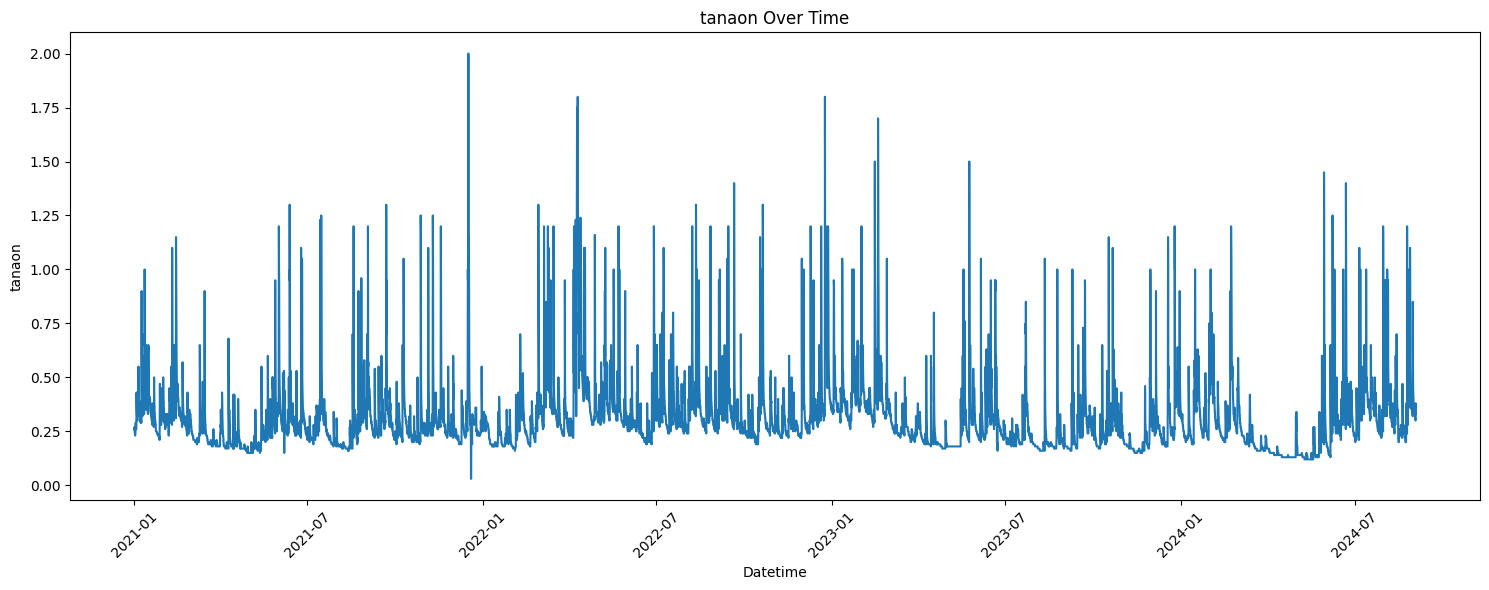

In [53]:
plt.figure(figsize=(15, 6))  # Adjust width and height as needed
plt.plot(df_['datetime'], df_['tanaon'])
plt.xlabel('Datetime')
plt.ylabel('tanaon')
plt.title('tanaon Over Time')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [54]:
df_mf_tanaon = df_[['datetime', 'tanaon']]
df_mf_tanaon.to_excel('df_mf_tanaon.xlsx')

In [2]:
df_mf_tanaon = pd.read_excel('df_mf_tanaon.xlsx')

In [6]:
df_mf_tanaon.loc[(df_mf_tanaon['tanaon'] > 2) | (df_mf_tanaon['tanaon'] < 0), 'tanaon'] = 0
df_mf_tanaon['tanaon'] = df_mf_tanaon['tanaon'].replace(0, pd.NA).ffill()

In [3]:
df_mf_tanaon = df_mf_tanaon.drop(columns=['Unnamed: 0' ])
df_mf_tanaon.head()


,datetime,tanaon
0,2021-01-01 01:00:00,0.26
1,2021-01-01 02:00:00,0.26
2,2021-01-01 03:00:00,0.26
3,2021-01-01 04:00:00,0.26
4,2021-01-01 05:00:00,0.26


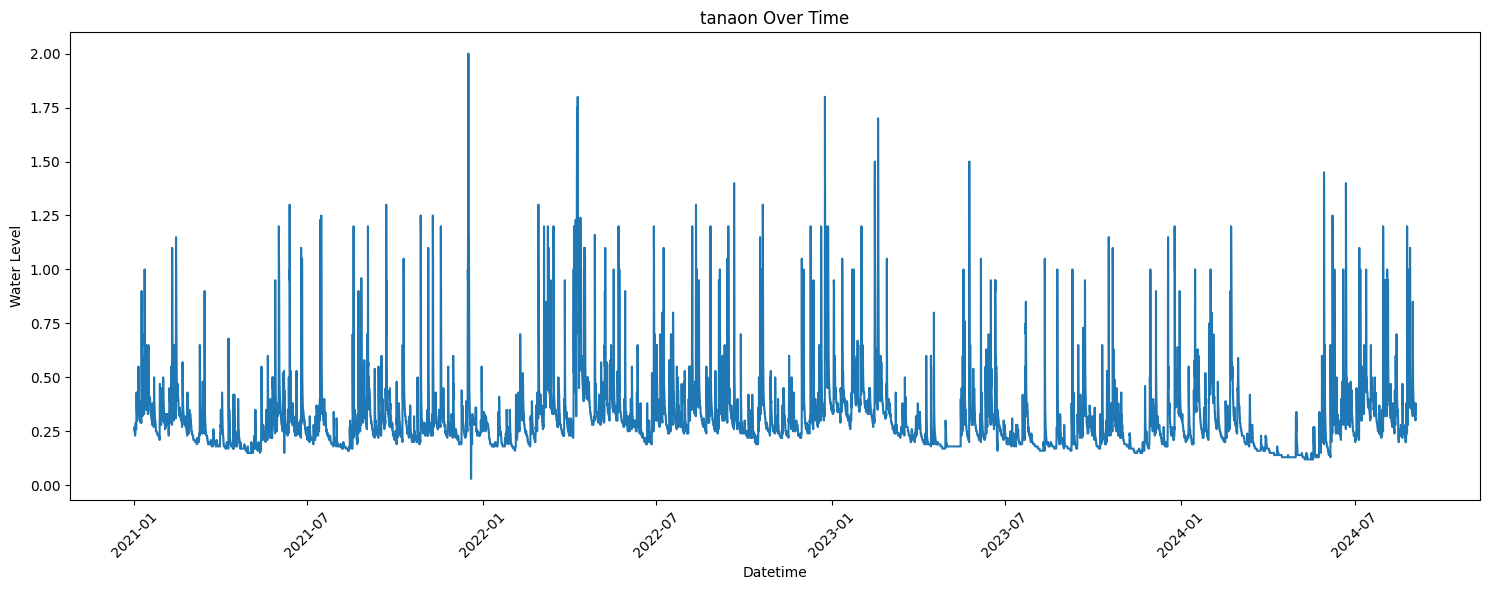

In [7]:
plt.figure(figsize=(15, 6))  # Adjust width and height as needed
plt.plot(df_mf_tanaon['datetime'], df_mf_tanaon['tanaon'])
plt.xlabel('Datetime')
plt.ylabel('Water Level')
plt.title('tanaon Over Time')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [8]:
import tensorflow as tf
import keras
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
level_data_scaled = scaler.fit_transform(df_mf_tanaon['tanaon'].values.reshape(-1,1))


In [ ]:
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(level_data_scaled)):
    X.append(level_data_scaled[i-sequence_length:i, 0])
    y.append(level_data_scaled[i, 0])

In [11]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [12]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))  # Only the last time step

# Adding a Dense layer to match the output shape with y_train
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

Epoch 1/100
823/823 [==============================] - 60s 68ms/step - loss: 0.0018 - val_loss: 5.8997e-04
Epoch 2/100
823/823 [==============================] - 48s 59ms/step - loss: 6.2330e-04 - val_loss: 4.7333e-04
Epoch 3/100
823/823 [==============================] - 50s 61ms/step - loss: 5.8844e-04 - val_loss: 4.6230e-04
Epoch 4/100
823/823 [==============================] - 51s 63ms/step - loss: 5.7248e-04 - val_loss: 6.1387e-04
Epoch 5/100
823/823 [==============================] - 53s 64ms/step - loss: 5.6170e-04 - val_loss: 4.3569e-04
Epoch 6/100
823/823 [==============================] - 52s 63ms/step - loss: 5.4816e-04 - val_loss: 4.6829e-04
Epoch 7/100
823/823 [==============================] - 52s 64ms/step - loss: 5.5018e-04 - val_loss: 4.6604e-04
Epoch 8/100
823/823 [==============================] - 52s 63ms/step - loss: 5.5398e-04 - val_loss: 4.3028e-04
Epoch 9/100
823/823 [==============================] - 52s 63ms/step - loss: 5.3022e-04 - val_loss: 4.5113e-04
Epoch

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.save('tanaon_lstm_attention.h5')

In [19]:
from tensorflow.keras.models import load_model

model = load_model('tanaon_lstm_attention.h5')

In [20]:
mf1_tanaon = df_mf_tanaon['tanaon'].values[-60:]  # Last 60 days

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(mf1_tanaon.reshape(-1, 1))

# Make predictions
predicted_level = []
current_batch = scaled_data.reshape(1, 60, 1)

predictions = model.predict(current_batch)

1/1 [==============================] - 1s 694ms/step


In [21]:
for i in range(24):  # Predicting 24 hours
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_level.append(scaler.inverse_transform(next_prediction)[0, 0])

1/1 [==============================] - 0s 19ms/step


In [23]:
for i, level in enumerate(predicted_level, 1):
    print(f"Hour {i} prediction: {level}")

Hour 1 prediction: 0.32685524225234985
Hour 2 prediction: 0.32307693362236023
Hour 3 prediction: 0.32029831409454346
Hour 4 prediction: 0.3187466859817505
Hour 5 prediction: 0.3179279565811157
Hour 6 prediction: 0.31746822595596313
Hour 7 prediction: 0.3171413540840149
Hour 8 prediction: 0.3168076276779175
Hour 9 prediction: 0.3164157569408417
Hour 10 prediction: 0.31597280502319336
Hour 11 prediction: 0.31550633907318115
Hour 12 prediction: 0.31506261229515076
Hour 13 prediction: 0.314705491065979
Hour 14 prediction: 0.3144778609275818
Hour 15 prediction: 0.3143768608570099
Hour 16 prediction: 0.3144066631793976
Hour 17 prediction: 0.3146537244319916
Hour 18 prediction: 0.31527939438819885
Hour 19 prediction: 0.3166646361351013
Hour 20 prediction: 0.32002681493759155
Hour 21 prediction: 0.3287835419178009
Hour 22 prediction: 0.3396899700164795
Hour 23 prediction: 0.33945897221565247
Hour 24 prediction: 0.3370206654071808


In [69]:
for i, price in enumerate(predicted_level, 1):
    print(f"Hour {i} prediction: {price}")

Hour 1 prediction: 0.3215459883213043
Hour 2 prediction: 0.3156927525997162
Hour 3 prediction: 0.31201279163360596
Hour 4 prediction: 0.30973294377326965
Hour 5 prediction: 0.3086453080177307
Hour 6 prediction: 0.3086024522781372
Hour 7 prediction: 0.30943119525909424
Hour 8 prediction: 0.310894250869751
Hour 9 prediction: 0.3126974105834961
Hour 10 prediction: 0.31453365087509155
Hour 11 prediction: 0.316143274307251
Hour 12 prediction: 0.31735754013061523
Hour 13 prediction: 0.3181082606315613
Hour 14 prediction: 0.31840768456459045
Hour 15 prediction: 0.3183170258998871
Hour 16 prediction: 0.31791865825653076
Hour 17 prediction: 0.3172975182533264
Hour 18 prediction: 0.31653162837028503
Hour 19 prediction: 0.31568795442581177
Hour 20 prediction: 0.3148217797279358
Hour 21 prediction: 0.3139771521091461
Hour 22 prediction: 0.313187837600708
Hour 23 prediction: 0.3124780058860779
Hour 24 prediction: 0.3118632435798645


In [71]:
mf1_tanaon

array([0.39, 0.39, 0.38, 0.38, 0.38, 0.37, 0.36, 0.36, 0.36, 0.35, 0.35,
       0.35, 0.34, 0.34, 0.34, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.34, 0.34, 0.34, 0.34, 0.34, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.32, 0.32, 0.32, 0.31, 0.31, 0.31, 0.31,
       0.31, 0.31, 0.3 , 0.3 , 0.3 , 0.3 , 0.32, 0.32, 0.32, 0.38, 0.38,
       0.36, 0.35, 0.35, 0.35, 0.33])

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply

model = Sequential()
input_shape = (X_train.shape[1], 1)

# Adding LSTM layers with return_sequences=True
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=50, return_sequences=True))


# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')

# Permute and reshape for compatibility
model.add(Permute((2, 1)))
model.add(Reshape((-1, X_train.shape[1])))
# attention_result = attention([model.output, model.output])
attention_result = attention([model.layers[-1].output, model.layers[-1].output])
multiply_layer = Multiply()([model.output, attention_result])
# Return to original shape
model.add(Permute((2, 1)))
model.add(Reshape((-1, 50)))

# Adding a Flatten layer before the final Dense layer
model.add(tf.keras.layers.Flatten())

# Final Dense layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

Epoch 1/100
823/823 [==============================] - 28s 31ms/step - loss: 0.0023 - val_loss: 7.4607e-04
Epoch 2/100
823/823 [==============================] - 28s 34ms/step - loss: 7.5435e-04 - val_loss: 5.4924e-04
Epoch 3/100
823/823 [==============================] - 27s 33ms/step - loss: 6.0460e-04 - val_loss: 4.7050e-04
Epoch 4/100
823/823 [==============================] - 30s 37ms/step - loss: 5.8068e-04 - val_loss: 4.5944e-04
Epoch 5/100
823/823 [==============================] - 31s 38ms/step - loss: 5.7418e-04 - val_loss: 4.4238e-04
Epoch 6/100
823/823 [==============================] - 32s 39ms/step - loss: 5.6818e-04 - val_loss: 4.4841e-04
Epoch 7/100
823/823 [==============================] - 32s 38ms/step - loss: 5.6853e-04 - val_loss: 5.1533e-04
Epoch 8/100
823/823 [==============================] - 32s 38ms/step - loss: 5.5784e-04 - val_loss: 5.3152e-04
Epoch 9/100
823/823 [==============================] - 32s 39ms/step - loss: 5.5382e-04 - val_loss: 4.5101e-04
Epoch

In [25]:
model.save('tanaon_lstm_attention_1.h5')

In [28]:
model = load_model('tanaon_lstm_attention_1.h5')
mf1_tanaon = df_mf_tanaon['tanaon'].values[-60:]  # Last 60 days

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(mf1_tanaon.reshape(-1, 1))

# Make predictions
predicted_level = []
current_batch = scaled_data.reshape(1, 60, 1)

predictions = model.predict(current_batch)

1/1 [==============================] - 1s 1s/step


In [29]:
for i in range(24):  # Predicting 24 hours
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_level.append(scaler.inverse_transform(next_prediction)[0, 0])

1/1 [==============================] - 0s 39ms/step


In [ ]:
for i, level in enumerate(predicted_level, 1):
    print(f"Hour {i} prediction: {level}")

Hour 1 prediction: 0.3275373876094818
Hour 2 prediction: 0.32512974739074707
Hour 3 prediction: 0.3191474378108978
Hour 4 prediction: 0.3209435045719147
Hour 5 prediction: 0.3225826025009155
Hour 6 prediction: 0.3227839767932892
Hour 7 prediction: 0.32331588864326477
Hour 8 prediction: 0.32433485984802246
Hour 9 prediction: 0.32357099652290344
Hour 10 prediction: 0.32685306668281555
Hour 11 prediction: 0.3331051766872406
Hour 12 prediction: 0.33768928050994873
Hour 13 prediction: 0.3371604382991791
Hour 14 prediction: 0.34033527970314026
Hour 15 prediction: 0.34469836950302124
Hour 16 prediction: 0.3449697196483612
Hour 17 prediction: 0.3454691767692566
Hour 18 prediction: 0.34701788425445557
Hour 19 prediction: 0.3440215587615967
Hour 20 prediction: 0.34138137102127075
Hour 21 prediction: 0.3375460207462311
Hour 22 prediction: 0.3357480466365814
Hour 23 prediction: 0.3343638479709625
Hour 24 prediction: 0.3315258324146271


In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply, Input
import tensorflow as tf

# Define input shape explicitly
input_shape = (X_train.shape[1], 1)
model_input = Input(shape=input_shape)

# Adding LSTM layers with return_sequences=True
x = LSTM(units=50, return_sequences=True)(model_input)
x = LSTM(units=50, return_sequences=True)(x)

# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')
# Permute and reshape for compatibility
x = Permute((2, 1))(x)
x = Reshape((-1, X_train.shape[1]))(x)
attention_result = attention([x, x]) # Use the output of the last layer (x)
x = Multiply()([x, attention_result])
# Return to original shape
x = Permute((2, 1))(x)
x = Reshape((-1, 50))(x)

# Adding a Flatten layer before the final Dense layer
x = tf.keras.layers.Flatten()(x)

# Final Dense layer
model_output = Dense(1)(x)

# Create the model
model = tf.keras.Model(inputs=model_input, outputs=model_output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

Epoch 1/100
823/823 [==============================] - 56s 65ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 2/100
823/823 [==============================] - 55s 67ms/step - loss: 0.0013 - val_loss: 7.2271e-04
Epoch 3/100
823/823 [==============================] - 65s 79ms/step - loss: 7.9701e-04 - val_loss: 7.5886e-04
Epoch 4/100
823/823 [==============================] - 60s 73ms/step - loss: 6.9713e-04 - val_loss: 4.9780e-04
Epoch 5/100
823/823 [==============================] - 55s 67ms/step - loss: 6.4083e-04 - val_loss: 5.3309e-04
Epoch 6/100
823/823 [==============================] - 55s 66ms/step - loss: 6.3481e-04 - val_loss: 6.9280e-04
Epoch 7/100
823/823 [==============================] - 61s 74ms/step - loss: 6.1709e-04 - val_loss: 5.3896e-04
Epoch 8/100
823/823 [==============================] - 59s 72ms/step - loss: 5.9579e-04 - val_loss: 4.5633e-04
Epoch 9/100
823/823 [==============================] - 60s 72ms/step - loss: 5.8697e-04 - val_loss: 4.4943e-04
Epoch 10/100


In [52]:
model.save('tanaon_lstm_attention_2.h5')

In [54]:
model = load_model('tanaon_lstm_attention_2.h5')
mf1_tanaon = df_mf_tanaon['tanaon'].values[-60:]  # Last 60 days

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(mf1_tanaon.reshape(-1, 1))

# Make predictions
predicted_level = []
current_batch = scaled_data.reshape(1, 60, 1)

predictions = model.predict(current_batch)

1/1 [==============================] - 1s 552ms/step


In [ ]:
for i in range(24):  # Predicting 24 hours
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_level.append(scaler.inverse_transform(next_prediction)[0, 0])

1/1 [==============================] - 0s 33ms/step


In [35]:
for i, level in enumerate(predicted_level, 1):
    print(f"Hour {i} prediction: {level}")

Hour 1 prediction: 0.32683494687080383
Hour 2 prediction: 0.32608962059020996
Hour 3 prediction: 0.3257487118244171
Hour 4 prediction: 0.31735479831695557
Hour 5 prediction: 0.3191010355949402
Hour 6 prediction: 0.32093778252601624
Hour 7 prediction: 0.32720065116882324
Hour 8 prediction: 0.3214746415615082
Hour 9 prediction: 0.31994321942329407
Hour 10 prediction: 0.3161294758319855
Hour 11 prediction: 0.31406718492507935
Hour 12 prediction: 0.31999465823173523
Hour 13 prediction: 0.3187740743160248
Hour 14 prediction: 0.3212635815143585
Hour 15 prediction: 0.3191211521625519
Hour 16 prediction: 0.31694331765174866
Hour 17 prediction: 0.3201538026332855
Hour 18 prediction: 0.32633888721466064
Hour 19 prediction: 0.327032208442688
Hour 20 prediction: 0.336081326007843
Hour 21 prediction: 0.33893394470214844
Hour 22 prediction: 0.3374863266944885
Hour 23 prediction: 0.33792510628700256
Hour 24 prediction: 0.34110867977142334


In [37]:
from keras.layers import BatchNormalization, Dropout
from keras.models import Model # Import Model

# ... (Your existing model definition from ipython-input-18) ...

# Instead of model.add, create new layers and connect them
x = Dropout(0.2)(x)  # Apply Dropout to the output of the previous layer
x = BatchNormalization()(x)  # Apply Batch Normalization

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
# Assume 'data' is your preprocessed dataset
train_size = int(len(df_mf_tanaon) * 0.8)
train_data, test_data = df_mf_tanaon[:train_size], df_mf_tanaon[train_size:]

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 lstm_5 (LSTM)                  (None, 60, 50)       10400       ['input_1[0][0]']                
                                                                                                  
 lstm_6 (LSTM)                  (None, 60, 50)       20200       ['lstm_5[0][0]']                 
                                                                                                  
 permute_2 (Permute)            (None, 50, 60)       0           ['lstm_6[0][0]']                 
                                                                                              

In [47]:
from keras.layers import BatchNormalization, Dropout
from keras.models import Model # Import Model

# ... (Your existing model definition from ipython-input-18) ...

# Instead of model.add, create new layers and connect them
x = Dropout(0.2)(x)  # Apply Dropout to the output of the previous layer
x = BatchNormalization()(x)  # Apply Batch Normalization

In [48]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
# Assume 'data' is your preprocessed dataset
train_size = int(len(df_mf_tanaon) * 0.8)
train_data, test_data = df_mf_tanaon[:train_size], df_mf_tanaon[train_size:]

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 lstm_5 (LSTM)                  (None, 60, 50)       10400       ['input_1[0][0]']                
                                                                                                  
 lstm_6 (LSTM)                  (None, 60, 50)       20200       ['lstm_5[0][0]']                 
                                                                                                  
 permute_2 (Permute)            (None, 50, 60)       0           ['lstm_6[0][0]']                 
                                                                                              

In [51]:
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

Epoch 1/100
823/823 [==============================] - 63s 71ms/step - loss: 3.5798e-04 - val_loss: 6.4453e-04
Epoch 2/100
823/823 [==============================] - 59s 72ms/step - loss: 3.5749e-04 - val_loss: 6.6853e-04
Epoch 3/100
823/823 [==============================] - 63s 76ms/step - loss: 3.5482e-04 - val_loss: 6.6896e-04
Epoch 4/100
823/823 [==============================] - 63s 76ms/step - loss: 3.5252e-04 - val_loss: 6.8015e-04
Epoch 5/100
823/823 [==============================] - 60s 73ms/step - loss: 3.4815e-04 - val_loss: 6.4344e-04
Epoch 6/100
823/823 [==============================] - 57s 70ms/step - loss: 3.4627e-04 - val_loss: 6.3370e-04
Epoch 7/100
823/823 [==============================] - 63s 76ms/step - loss: 3.4795e-04 - val_loss: 6.6025e-04
Epoch 8/100
823/823 [==============================] - 60s 72ms/step - loss: 3.4424e-04 - val_loss: 7.0840e-04
Epoch 9/100
823/823 [==============================] - 72s 88ms/step - loss: 3.3959e-04 - val_loss: 6.7739e-04
E

KeyboardInterrupt: 